#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**EQUIPO 41**

**Nombres y matrículas de los integrantes del equipo:**

*   Miguel Guillermo Galindo Orozco (A01793695)
*   Jorge Iván Hidalgo Reyes (A01794221)
*   Julio Cesar Lynn Jimenez (A01793660)
*   Nicolás Mojica Gómez (A01794354)
*   Marco Antonio Pérez Castellanos (A01793473)


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedStratifiedKFold

from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV

from sklearn import tree
import pydotplus 
from IPython.display import Image

#**Ejercicio-1.** 

Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como
se indica en la página de la UCI.

In [ ]:
df = pd.read_csv('/content/SouthGermanCredit.asc',sep=' ')
df.head()
columns =['status','duration','credit_history','purpose','amount','savings','employment_duration','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','number_credits','job','people_liable','telephone','foreign_worker','credit_risk']
df.columns = columns
df.head()


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


#**Ejercicio-2.** 

Realiza una partición de los datos en el conjunto de entrenamiento del 85% y el de prueba de
15%. Los modelos se estarán entrenando con el método de validación cruzada, así que no es 
necesario en este paso generar el conjunto de validación. Define como la variable X a todas las
variables de entrada y a la variable Y como la variable de salida

In [ ]:
X = df.iloc[:,:-1]  
Y = df.iloc[:,-1]  

Xtv, Xtest, ytv, ytest = train_test_split(X, Y, test_size=0.15, stratify=Y, random_state=1)  

print(Xtv.shape, ': dimensión de datos de entrada para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada para prueba')  

print(ytv.shape, ': dimensión de variable de salida para entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida para prueba')

(850, 20) : dimensión de datos de entrada para entrenamiento y validación
(150, 20) : dimensión de datos de entrada para prueba
(850,) : dimensión de variable de salida para entrenamiento y validación
(150,) : dimensión de variable de salida para prueba


#**Ejercicio-3.** 

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas
para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de
cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal
(discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha
información realiza un Pipeline que incluya al menos las siguientes transformaciones:

In [ ]:
# Identificamos el número de missing values en cada columna
df.isnull().sum()



status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Como podemos ver no hay datos pérdidos, de cualquier forma creamos las transformaciones que se indican en el ejercicio.

Hacemos la imputación a los datos pérdidos de tipo númerico lo hacemos a través de la mediana que es una estadística robusta (no es sensible a valores atípicos), y los escalamos para que sean comparables.

Los de tipos categórico y binario los imputamos a través de la moda ( el valor más frecuente).Como se indica aplicamos la transformación One-Hot; la estrategia que implementa es crear una columna para cada valor distinto que exista en la característica que estamos codificando y, para cada registro, marcar con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0, es de mayor relevancia en las de tipo binario pues las codifica de esta forma y evita tener otro tipo de valores/datos. 

- a) Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable
(decide y justifica que tipo de imputación realizas en cada caso).
- b) Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una
transformación que escale a todas ellas en un rango equiparable. 

In [ ]:
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['duration','amount','age']

JUSTIFICACION IMPUTACIONES PARA VARIABLES NUMERICAS:

Para el conjunto de feactures numericos se puede tomar en este caso: 'duration' , 'amount' y 'age' , y al ser las 3 variables de naturaleza continua se utiliza la imputacion "median".

In [ ]:
# Transformaciones a factores categóricos de entrada( a partir de people_liable son binarias):
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['status', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing','people_liable','telephone','foreign_worker']

JUSTIFICACION IMPUTACIONES PARA VARIABLES CATEGORIAS:

Para el conjunto de feactures categoricos, usamos: 'status' ,  'purpose', 'savings' ,  'personal_status_sex' , 'other_debtors', 'other_installment_plans' , 'housing','people_liable','telephone' , 'foreign_worker , y  el imputador que usamos es el 'most_frequent' entendiendo que la mayoria de variables son nominales.

- c)  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y
binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique la
transformación one-hot encoding. Por el momento dejar las variables ordinales sin
transformar. 

JUSTIFICACIÓN ONE HOT - ENCODING: 

La transformación de one hot encoding crea una columna para cada valor distinto que exista en la característica que estamos codificando, de tal forma que, marca con un 1 la columna a la que pertenezca dicho registro y dejar las demás con 0. Esto permite resumir la información de las variables categóricas, y que puedan ser utilizados en distintos algoritmos de machine learning. 
En específico, aplciarla a una variable binaria, permite transformar el tipo de dato en numérico, y que este sea aplicable a cualquier algormitmo. 
Por ejemplo, una variable como género con los valores ('hombre','mujer') se aplica la transformación ONE-HOT-ENCODING y permite resumir la información y trasladar la información a numérico. 



In [ ]:
# Transformaciones one-hot-encoder de las categóricas y binarias:
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first',handle_unknown='ignore'))])
catOHE_pipeline_nombres = ['status', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing','people_liable','telephone','foreign_worker']

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#**Ejercicio-4.**

 Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de
aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás
llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda
aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las
siguientes características: 

- a) Usa los parámetros predeterminados de cada modelo

In [ ]:
def get_models():
 modelos, nombres = list(), list()

# LR - Regresión Logística:
 modelos.append(LogisticRegression(solver='liblinear'))
 nombres.append('LR')

# DT - Árbol de Decisión:
 modelos.append(DecisionTreeClassifier())
 nombres.append('DT')

# DT - Bosques Aleatorios:
 modelos.append(RandomForestClassifier())
 nombres.append('RF')
  
 return modelos, nombres

- b) En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
de scikit-learn para definir las métricas).

In [ ]:
### Definición de Funciones para cálculo de Métricas

def mi_accuracy(yreal, ypred):
  m_c = confusion_matrix(yreal, ypred)
  accuracy = (m_c[0,0] + m_c[1,1]) /(m_c[0,0] + m_c[1,1] + m_c[0,1] + m_c[1,0])
  return accuracy

def mi_precision(yreal, ypred): 
  m_c = confusion_matrix(yreal, ypred)
  precision = m_c[1,1] / (m_c[1,1] + m_c[0,1])
  return precision

def mi_recall(yreal, ypred):
  m_c = confusion_matrix(yreal, ypred)  
  recall = (m_c[1,1]) / (m_c[1,1] + m_c[1,0])
  return recall

def mi_f1_score(yreal, ypred):
  m_c = confusion_matrix(yreal, ypred)  
  f1_score = (2*m_c[1,1]) / ((2*m_c[1,1]) + m_c[0,1] + m_c[1,0])
  return f1_score

def mi_gmean(yreal, ypred):
  m_c = confusion_matrix(yreal, ypred)
  recall = m_c[1,1] / (m_c[1,1] + m_c[1,0])
  especificidad = m_c[0,0] / (m_c[0,0] + m_c[0,1])
  gmean = np.sqrt(recall*especificidad)
  return gmean
    


- c) Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.

In [ ]:
modelos, nombres = get_models()
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
  scores = cross_val_score(pipeline, Xtv, np.ravel(ytv), scoring=make_scorer(mi_accuracy, greater_is_better=True), cv=cv)

  resultados.append(scores)
  print('>> %s: %.3f (%.3f)' % (nombres[i], np.mean(scores), np.std(scores)))

>> LR: 0.764 (0.039)
>> DT: 0.688 (0.051)
>> RF: 0.761 (0.033)


In [ ]:
## Entrenar y calcular las métricas solicitadas bajo los modelos con parámetros en default
modelos, nombres = get_models()
resultados = list()   

for i in range(len(modelos)):

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1234)
  
  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  mismetricas = {'accuracy':make_scorer(mi_accuracy, greater_is_better=True),
                 'precision':make_scorer(mi_precision, greater_is_better=True), 
                 'recall': make_scorer(mi_recall, greater_is_better=True), 
                 'f1_score': make_scorer(mi_f1_score, greater_is_better=True),                  
                 'gmean':make_scorer(mi_gmean, greater_is_better=True)}
  
  resultados_print = cross_validate(pipeline,Xtv,np.ravel(ytv),scoring=mismetricas,cv=kfold, return_train_score=True)

  resultados.append(resultados_print) 

  print('%s:\nmean Train Accuracy: %.3f (%.4f)\nmean Test Accuracy: %.3f (%.4f)\nmean Train Precision: %.3f (%.4f)\nmean Test Precision: %.3f (%.4f)\nmean Train Recall: %.3f (%.4f)\nmean Test Recall: %.3f (%.4f)\nmean Train F1_Score: %.3f (%.4f)\nmean Test F1_Score: %.3f (%.4f)\nmean Train Gmean: %.3f (%.4f)\nmean Test Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultados_print['train_accuracy']),
                                                                          np.std(resultados_print['train_accuracy']),
                                                                          np.mean(resultados_print['test_accuracy']),
                                                                          np.std(resultados_print['test_accuracy']),
                                                                          
                                                                          np.mean(resultados_print['train_precision']),
                                                                          np.std(resultados_print['train_precision']), 
                                                                          np.mean(resultados_print['test_precision']),
                                                                          np.std(resultados_print['test_precision']), 
                                                                          
                                                                          np.mean(resultados_print['train_recall']),
                                                                          np.std(resultados_print['train_recall']),
                                                                          np.mean(resultados_print['test_recall']),
                                                                          np.std(resultados_print['test_recall']),
                                                                          
                                                                          np.mean(resultados_print['train_f1_score']),
                                                                          np.std(resultados_print['train_f1_score']),
                                                                          np.mean(resultados_print['test_f1_score']),
                                                                          np.std(resultados_print['test_f1_score']),
                                                                          
                                                                          np.mean(resultados_print['train_gmean']),
                                                                          np.std(resultados_print['train_gmean']),  
                                                                          np.mean(resultados_print['test_gmean']),
                                                                          np.std(resultados_print['test_gmean'])
                                                                          
                                                                          ))

  
  

LR:
mean Train Accuracy: 0.799 (0.0074)
mean Test Accuracy: 0.769 (0.0238)
mean Train Precision: 0.824 (0.0069)
mean Test Precision: 0.806 (0.0196)
mean Train Recall: 0.906 (0.0062)
mean Test Recall: 0.883 (0.0275)
mean Train F1_Score: 0.863 (0.0048)
mean Test F1_Score: 0.842 (0.0165)
mean Train Gmean: 0.705 (0.0138)
mean Test Gmean: 0.664 (0.0430)

DT:
mean Train Accuracy: 1.000 (0.0000)
mean Test Accuracy: 0.699 (0.0300)
mean Train Precision: 1.000 (0.0000)
mean Test Precision: 0.788 (0.0266)
mean Train Recall: 1.000 (0.0000)
mean Test Recall: 0.783 (0.0429)
mean Train F1_Score: 1.000 (0.0000)
mean Test F1_Score: 0.784 (0.0235)
mean Train Gmean: 1.000 (0.0000)
mean Test Gmean: 0.625 (0.0501)

RF:
mean Train Accuracy: 1.000 (0.0000)
mean Test Accuracy: 0.762 (0.0225)
mean Train Precision: 1.000 (0.0000)
mean Test Precision: 0.788 (0.0125)
mean Train Recall: 1.000 (0.0000)
mean Test Recall: 0.901 (0.0267)
mean Train F1_Score: 1.000 (0.0000)
mean Test F1_Score: 0.841 (0.0163)
mean Train

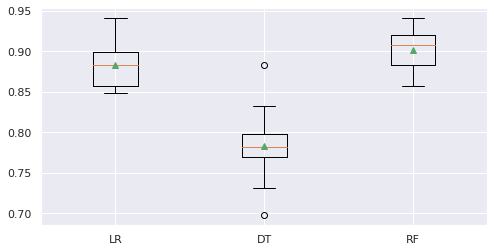

In [ ]:
### diagramas de caja y bigotes de los tres modelos con la métrica “recall” en TEST
sns.set(rc={'figure.figsize':(8,4)})

recall_list = list()
for i in range(len(resultados)):
  valor = resultados[i]['test_recall']
  recall_list.append(valor)

plt.boxplot(recall_list, labels=nombres, showmeans=True)

plt.show()

- d) Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como
para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la
métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu
respuesta. 

RESPUESTA:

Para las metricas de Recall en conjunto con los tres modelos se puede llegar a las siguientes conclusiones:

LR: El modelo se presenta como optimo dado que presenta una variacion minima de 2% menos el recall en el conjunto de entrenamiento con el conjunto de prueba, se puede determinar que se comporta bastante bien con los datos que no ha conocido el modelo.

DT: El modelo se presenta como sobreentrenado, evidentemente si el recall con el conjunto de entrenamiento tiene un 100% de ajuste es porque no va funcionar cuando se presenten los datos reales, incluso en las curvas de aprendizaje se ve la brecha entre entre entrenamiento y prueba lo que se traduce como un exceso de varianza en el modelo.

RF: El modelo se presenta como sobreentrenado, misma situacion, si en un modelo el conjunto de entrenamiento esta en el 100% eso puede traducir claramente que presenta un sobreentrenamiento y que en una situacion fuera de los datos con los que se entreno su exactitud ira disminuyendo.

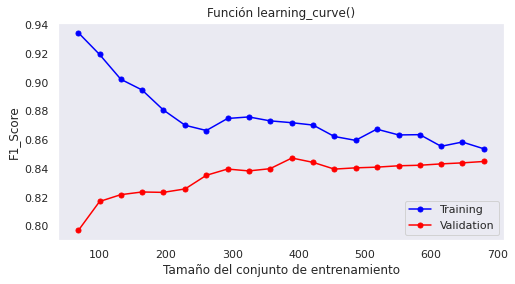

In [ ]:
### Learning Curve para Regresión Logística
## Iterando sobre el tamaño del conjunto de entrenamiento "Observando el F1_Score"

delta_train_sz = np.linspace(0.1, 1.0, 20)

cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

modelo = LogisticRegression(solver='liblinear')

train_sizes, train_scores, valid_scores = learning_curve(estimator=modelo, 
                                                        X=Xtv, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_f1_score, greater_is_better=True))



# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1_Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

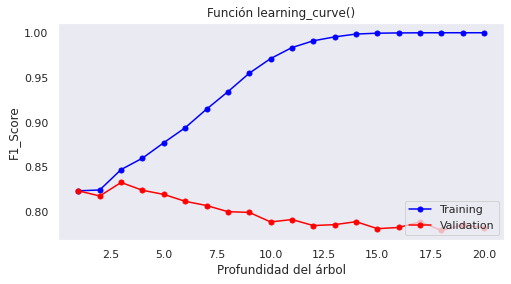

In [ ]:
### Learning Curve para Decision Tree
## Iterando sobre el tamaño la profundidad del árbol y observando el "F1 Score "

delta_max_depth = np.linspace(1, 20, 20)

resultados_train = list()
resultados_test = list()

for i in delta_max_depth:
 
  cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

  modelo = DecisionTreeClassifier(max_depth=i)

  resultados_max_depth = cross_validate(modelo,Xtv,np.ravel(ytv),scoring=make_scorer(mi_f1_score, greater_is_better=True),
                                  cv=cvLC, return_train_score=True)
  
  resultados_train.append(np.mean(resultados_max_depth['train_score']))

  resultados_test.append(np.mean(resultados_max_depth['test_score']))
  
# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

plt.plot(delta_max_depth, resultados_train, color='blue', marker='o', markersize=5, label='Training')

plt.plot(delta_max_depth, resultados_test, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Profundidad del árbol')
plt.ylabel('F1_Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

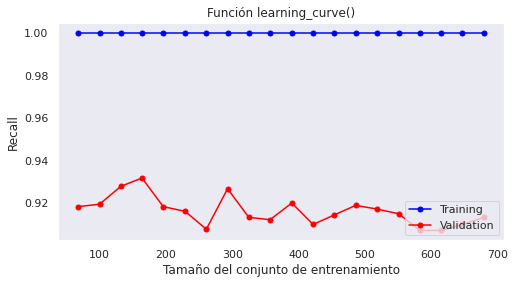

In [ ]:
### Learning Curve para Random Forest
## Iterando sobre el tamaño del conjunto de entrenamiento y observando el "Recall"

delta_train_sz = np.linspace(0.1, 1.0, 20)

cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=11)

modelo = RandomForestClassifier()

train_sizes, train_scores, valid_scores = learning_curve(estimator=modelo, 
                                                        X=Xtv, 
                                                        y=np.ravel(ytv),
                                                        cv=cvLC, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_recall, greater_is_better=True))



# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Recall')
plt.grid()
plt.legend(loc='lower right')
plt.show()

¿Alguno de los modelos está subentrenado o sobreentrenado?


#**Ejercicio-5.**

Finalmente veamos la manera de mejorar los valores de los hiperparámetros de cada modelo, así
como el problema del sobreentrenamiento de algunos de ellos. Para ello deberás usar el método
GridSearchCV() de scikit-learn. Recuerda que este método hace una búsqueda de los mejores
hiperparámetros de un modelo mediante el llamada formato de malla y aplicando validación
cruzada. En cada caso puedes incrementar el máximo de iteraciones,”max_iter” para que tengas
la convergencia adecuada para todas las combinaciones en cada modelo. Recuerda también
aplicar las transformaciones que definiste en tu Pipeline. Para fines de este ejercicio se ha
seleccionado para cada modelo una métrica diferente, que permita irte familiarizando con ellas. 

- a) Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores
hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su
búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso
deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de
parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la
métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 

In [ ]:
# a)

modelo = LogisticRegression(solver='liblinear',max_iter=5000)

#Definimos varios diccionarios para evitar combinaciones que no son posibles

# Diccionario para determinar la mejor combinación de los parámetros requeridos , consideremos que no todas las opciones posibles
# de parámetros se pueden combinar por ello seleccionamos solo aquellas posibles
dicc_grid_penalty={'C':[0.00001,0.0001,0.01,0.1,1.0,10.,100.,1000.,10000.],
                   'penalty':['l1','l2'],
                   'class_weight':['balanced', None],
                   'solver':['liblinear','saga']
             }

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)


grid = GridSearchCV(estimator=modelo, 
                    param_grid=dicc_grid_penalty, 
                    cv=cv, 
                    scoring=make_scorer(mi_f1_score, greater_is_better=True))

In [ ]:
# Transformamos los datos de entrada:
Xx = columnasTransformer.fit_transform(Xtv)

# Llevamos a cabo el proceso de etrenamiento con validación-cruzada y búsqueda de malla.
# Observa que de acuerdo a las opciones incluidas en la malla, se estarán realizando (6)(5)=30 
# combinaciones diferentes, además de las (10)(5)=50 particiones de la validación-cruzada,
# lo cual implica también un mayor tiempo de entrenamiento.

grid.fit(Xx, np.ravel(ytv))

print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

#Mejor valor de exactitud obtenido con la mejor combinación: 0.8473344389964989
#Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
#Métrica utilizada: make_scorer(mi_f1_score)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8473530006515376
Mejor combinación de valores encontrados de los hiperparámetros: {'C': 1.0, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
Métrica utilizada: make_scorer(mi_f1_score)


####¿Cuál es la utilidad de la métrica “f1-score”? 

Es de gran utilidad cuando se desea tener un balance entre Precision y Recall , adicionalmente si hay una distribución de clases desigual (gran número de negativos reales).Es práctico porque hace más fácil el poder comparar el rendimiento combinado de la precisión y la exhaustividad entre varias soluciones.

El valor F1 asume que nos importa de igual forma la precisión y la exhaustividad. Esto no tiene que ser así en todos los problemas.


- b) Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score”
para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento. 

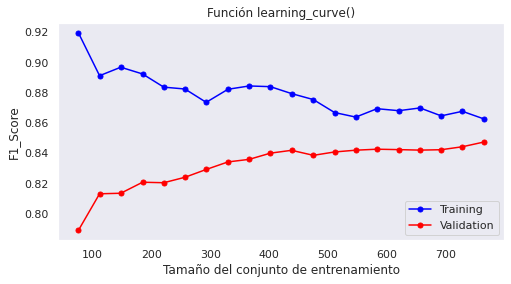

In [ ]:
# b)
### Learning Curve para Regresión Logística usando los mejores hiperparametros
## Iterando sobre el tamaño del conjunto de entrenamiento "Observando el F1_Score"

delta_train_sz = np.linspace(0.1, 1.0, 20)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=8)

modelo = LogisticRegression(C=1., penalty='l1', class_weight=None, solver='liblinear')

train_sizes, train_scores, valid_scores = learning_curve(estimator=modelo, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cv, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_f1_score, greater_is_better=True))



# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('F1_Score')
plt.grid()
plt.legend(loc='lower right')
plt.show()

- c) Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth,
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring)
“precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de
la métrica “precision”? Incluye tus conclusiones. 

In [ ]:
# c)
modeloDT = DecisionTreeClassifier()

# Incluiremos los siguientes hiperparametros a la busqueda: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
dt_param_grid = {'ccp_alpha': [0.1, .01],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': np.arange(1, 3, step=1),
                  'min_samples_split': np.arange(2, 10, step=1),
                  'class_weight': ['balanced', None]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

dt_grid = GridSearchCV(estimator=modeloDT, 
                        param_grid=dt_param_grid, 
                        cv=cv, 
                        scoring=make_scorer(mi_precision, greater_is_better=True))

Xx = columnasTransformer.fit_transform(Xtv)
dt_grid.fit(Xx, ytv)

print('Mejor valor de exactitud obtenido con la mejor combinación:', dt_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', dt_grid.best_params_)
print('Métrica utilizada:', dt_grid.scoring)

#Mejor valor de exactitud obtenido con la mejor combinación: 0.8648339490000723
#Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
#Métrica utilizada: make_scorer(mi_precision)


Mejor valor de exactitud obtenido con la mejor combinación: 0.8648339490000723
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.01, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_precision)


####¿Cuál es la utilidad de la métrica “precision”?

Es una métrica muy usada ya que respondería a una pregunta del estilo. ¿Qué porcentaje de las predicciones positivas fueron correctas?. Es decir con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.
Es de utilidad en casos específicos que se da prioridad al beneficio de acertar correctamente las predicciones de la clase positiva.

- d) Con los mejores valores de los hiperparámetros encontrados con la métrica “precision”
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento. 

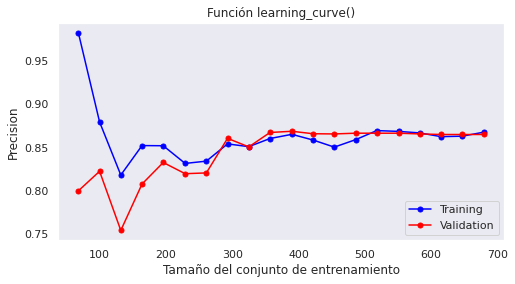

In [ ]:
# d)
### Learning Curve para Arbol de Decision usando los mejores hiperparametros
## Iterando sobre el tamaño del conjunto de entrenamiento "Observando la Precision"

delta_train_sz = np.linspace(0.1, 1.0, 20)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

modeloDT = DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', criterion='gini', max_depth=1, min_samples_split=2)

train_sizes, train_scores, valid_scores = learning_curve(estimator=modeloDT, 
                                                        X=Xx, 
                                                        y=np.ravel(ytv),
                                                        cv=cv, 
                                                        train_sizes=delta_train_sz,
                                                        scoring=make_scorer(mi_precision, greater_is_better=True))

# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')

plt.plot(train_sizes, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precision')
plt.grid()
plt.legend(loc='lower right')
plt.show()

- e) Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth,
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”.
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor
desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica
“recall”? Incluye tus conclusiones. 

In [ ]:
# e)
modeloRF = RandomForestClassifier()

# Incluiremos los siguientes hiperparametros a la busqueda: ccp_alpha, criterion, max_depth, min_samples_split y class_weight
rf_param_grid = {'ccp_alpha': [0.1, .01,0.001],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': np.arange(1, 3, step=1),
                  'min_samples_split': np.arange(2, 10, step=1),
                  'class_weight': ['balanced', None]}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=8)

rf_grid = GridSearchCV(estimator=modeloRF, 
                        param_grid=rf_param_grid, 
                        cv=cv, 
                        scoring=make_scorer(mi_recall, greater_is_better=True))

Xx = columnasTransformer.fit_transform(Xtv)
rf_grid.fit(Xx, ytv)

print('Mejor valor de exactitud obtenido con la mejor combinación:', rf_grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparámetros:', rf_grid.best_params_)
print('Métrica utilizada:', rf_grid.scoring)

#Mejor valor de exactitud obtenido con la mejor combinación: 1.0
#Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
#Métrica utilizada: recall

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
Métrica utilizada: make_scorer(mi_recall)


####¿Cuál es la utilidad de la métrica “recall”? 

Nos indica la proporción de casos positivos que están identificados correctamente por el modelo entre todos los positivos reales. La métrica de recall nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar. Es de gran utilidad en escenarios dónde es importante clasificar correctamente la clase positiva. 

- f) Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para
el modelo de bosque aleatorio, obtener las curvas de validación (validation curve),
incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con
al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres
adecuados para mejorar el resultado y evitar el sobreentrenamiento o el
subentrenamiento. 

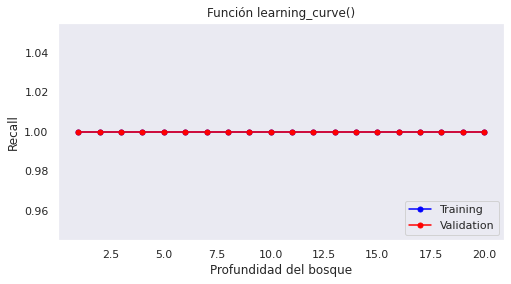

In [ ]:
# f)
### Learning Curve para bosque aleatorio usando los mejores hiperparametros
## Incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores.

# ****Importante , si usamos el mejor ccp_alpha=.1 para todos los niveles de profundida el Recall tanto
# **** training y validación es igual a 1 por lo que no podemos distinguir ambas curvas lo cual 
# ****nos dará una alta tasa de falsos positivos en el modelo

delta_max_depth = np.linspace(1, 20,20)

resultados_train = list()
resultados_test = list()

for i in delta_max_depth:
 
  cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

  modeloRF = RandomForestClassifier(max_depth=i,ccp_alpha=0.095, class_weight=None, criterion='gini',min_samples_split=2)

  resultados_max_depth = cross_validate(modeloRF,Xtv,np.ravel(ytv),scoring=make_scorer(mi_recall, greater_is_better=True),
                                  cv=cvLC, return_train_score=True)
  
  resultados_train.append(np.mean(resultados_max_depth['train_score']))

  resultados_test.append(np.mean(resultados_max_depth['test_score']))
  
# Obtengamos la gráfica de las curvas de aprendizaje 
# cuando se incrementa el tamaño de la muestra:

plt.plot(delta_max_depth, resultados_train, color='blue', marker='o', markersize=5, label='Training')

plt.plot(delta_max_depth, resultados_test, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función learning_curve()')
plt.xlabel('Profundidad del bosque')
plt.ylabel('Recall')
plt.grid()
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(resultados_train)
print(resultados_test)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


#**Ejercicio-6.**

Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando
el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo
de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para
entrenamiento y validación

- a) Obtener el modelo de regresión logística con los mejores parámetros que hayas
encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final
obtenido. 

In [ ]:
# a)Obtener el modelo de regresión logística con los mejores parámetros
modelo = LogisticRegression(C=1, penalty='l1', class_weight=None, solver='liblinear')

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modelo.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(mi_f1_score(ytest,modelo.predict(Xxtest)))

0.8251121076233184


###Conclusiones Modelo de Regresión Logistica.

El desempeño del modelo de regresión logística con el conjunto de prueba al revisar la métrica "f1 - score" es ligeramente menor (de 0.8473 disminuye a 0.825) en comparación con el resultado obtenido durante el proceso de búsqueda de la mejor combinación de valores en los hiperparámetros (empleando el conjunto de entrenamiento-validación).


- b) Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas
encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso. 

In [ ]:
# b)Obtener el modelo de árbol de decisiones con los mejores parámetros
modeloDT = DecisionTreeClassifier(ccp_alpha=0.01, class_weight='balanced', criterion='gini', max_depth=1, min_samples_split=2)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modeloDT.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(mi_precision(ytest,modeloDT.predict(Xxtest)))


0.8923076923076924


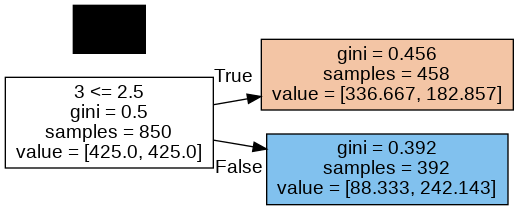

In [ ]:
dot_data = tree.export_graphviz(decision_tree=modeloDT, 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(Xxtest).columns.values),
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###Conclusiones Árbol de Decisión
Luego de entrenar el modelo de Árbol de Decisión usando la mejor combinación de hiperparámetros y de evaluarlo usando los datos de prueba por primera vez con este tipo de clasificador podemos observar incluso una mejor calificación de la métrica de precisión ya que nos da un 89% comparado con la precisión obtenida de 86% obtenida como mejor valor en el proceso de Grid Search. 

De igual forma podemos apreciar por medio de la gráfica de árbol que el valor Gini del nodo raíz presenta un valor de 0.5 lo que indica una mezcla balancead de las dos clases y cada nodo hijo adquiere una mayor pureza.


- c) Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas
encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. 

In [ ]:
#c) 
modeloRF = RandomForestClassifier(max_depth=1,ccp_alpha=0.1, class_weight=None, criterion='gini',min_samples_split=2)

# Entrenamos el modelo por última vez con los datos de entrenamiento y validación conjuntos:
Xct = columnasTransformer.fit(Xtv)
Xxt = Xct.transform(Xtv)
modeloRF.fit(Xxt, np.ravel(ytv))

# Transformamos los datos de prueba y los utilizamos por primera vez para obtener sus predicciones
# y desempeño del modelo:

Xxtest = Xct.transform(Xtest)
print(mi_recall(ytest,modeloRF.predict(Xxtest)))

1.0


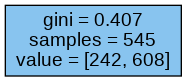

In [ ]:
# Cada elemento en modeloRF.estimators_ es un arbol de decisiones independiente. En total son 100 arboles en nuestro Bosque Aleatoreo 
dot_data = tree.export_graphviz(decision_tree=modeloRF.estimators_[99], 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(Xxtest).columns.values),
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

###Conclusiones Bosque Aleatorio
Una vez más después de tomar la medida de entrenar nuestro modelo con los mejores parámetros, en este caso el de Bosque Aleatorio, nos damos cuenta de que la métrica de “recall” tiene un valor de 1.0 tanto en la obtención de hiperparámetros como en la validación usando los datos de prueba. Esto quiere decir que ningunos de los dos casos se detectan Falsos Negativos.

Además, es interesante hacer un análisis exploratorio de los distintos Árboles de Decisión que integran nuestro Bosque ya que al tratarse de cien árboles que en conjunto integran nuestro bosque ya no es tan práctico el graficarlos todos a la vez. Sin embargo, una idea para dar continuación al ejercicio pudiera ser identificar aquellos árboles que tengan mejor valoración para obtener un mejor entendimiento de nuestro modelo, claro que sin perder de vista que es bosque en su totalidad el que permite clasificar y lanzar predicciones.


###**Fin de la Actividad de la semana 6.**